In [1]:
import sys
print(sys.executable)

/Users/gaozhiyong/Documents/pyenvs/venv3.7.1/bin/python


In [2]:
!python -V
!pip -V

Python 3.7.1
pip 20.2.4 from /Users/gaozhiyong/Documents/pyenvs/venv3.7.1/lib/python3.7/site-packages/pip (python 3.7)


## 数据采集

In [3]:
import requests
import pandas as pd
from lxml import etree

In [4]:
html = 'https://3g.dxy.cn/newh5/view/pneumonia'
html_data = requests.get(html)
html_data.encoding = 'utf-8'
html_data = etree.HTML(html_data.text,etree.HTMLParser())
html_data = html_data.xpath(
    '//*[@id="getListByCountryTypeService2true"]/text()'
)

# 集合
ncov_world = html_data[0][49:-12]
ncov_world = ncov_world.replace('true','True')
ncov_world = ncov_world.replace('false','False')
ncov_world = eval(ncov_world)
ncov_world

({'id': 5884766,
  'createTime': 1603423173000,
  'modifyTime': 1603423173000,
  'tags': '',
  'countryType': 2,
  'continents': '北美洲',
  'provinceId': '8',
  'provinceName': '美国',
  'provinceShortName': '',
  'cityName': '',
  'currentConfirmedCount': 4828687,
  'confirmedCount': 8404743,
  'confirmedCountRank': 1,
  'suspectedCount': 0,
  'curedCount': 3353056,
  'deadCount': 223000,
  'deadCountRank': 1,
  'deadRate': '2.65',
  'deadRateRank': 57,
  'comment': '',
  'sort': 0,
  'operator': 'yehao',
  'locationId': 971002,
  'countryShortCode': 'USA',
  'countryFullName': 'United States of America',
  'statisticsData': 'https://file1.dxycdn.com/2020/0315/553/3402160512808052518-135.json',
  'incrVo': {'currentConfirmedIncr': 6416,
   'confirmedIncr': 6476,
   'curedIncr': 0,
   'deadIncr': 60},
  'showRank': True},
 {'id': 5884763,
  'createTime': 1603423173000,
  'modifyTime': 1603423173000,
  'tags': '',
  'countryType': 2,
  'continents': '欧洲',
  'provinceId': '5',
  'provinceNam

In [5]:
country = []
confirmed = []
lived =[]
dead =[]

In [6]:
# 分离国家名称，确诊人数、治愈人书和死亡人数并存入dataframe
for i in ncov_world:
    country.append(i['provinceName'])
    confirmed.append(i['confirmedCount'])
    lived.append(i['curedCount'])
    dead.append(i['deadCount'])
    
data_world = pd.DataFrame()
data_world['国家名称'] = country
data_world['确诊人数'] = confirmed
data_world['治愈人数'] = lived
data_world['死亡人数'] = dead
data_world.head()

,国家名称,确诊人数,治愈人数,死亡人数
0,美国,8404743,3353056,223000
1,法国,999043,108599,34210
2,西班牙,1026281,150376,34521
3,英国,810467,539,44347
4,印度,7706946,6874518,116616


In [7]:
data_world

,国家名称,确诊人数,治愈人数,死亡人数
0,美国,8404743,3353056,223000
1,法国,999043,108599,34210
2,西班牙,1026281,150376,34521
3,英国,810467,539,44347
4,印度,7706946,6874518,116616
...,...,...,...,...
210,圣皮埃尔和密克隆群岛,16,0,0
211,福克兰群岛,13,0,0
212,蒙特塞拉特,13,0,1
213,安圭拉,3,0,0


### GDP数据分分析

- pandas.date_range()详解

| 参数 | 数据类型 | 意义 |
| ---- | ---- | ---- |
|start	|str or datetime-like, optional	|生成日期的左侧边界|
|end	|str or datetime-like, optional	|生成日期的右侧边界|
|periods	|integer, optional	|生成周期|
|freq	|str or DateOffset, default ‘D’	|可以有多种比如‘5H’，频率别名参见链接|
|tz	|str or tzinfo, optional	|返回本地化的DatetimeIndex的时区名，例如’Asia/Hong_Kong’|
|normalize	|bool, default False	|生成日期之前，将开始/结束时间初始化为午夜|
|name	|str, default None	|产生的DatetimeIndex的名字|
|closed	|{None, ‘left’, ‘right’}, optional	|使区间相对于给定频率左闭合、右闭合、双向闭合（默认的None）|
|**kwargs	| 	 为了兼容性，对结果没有影响 |

In [8]:
data_economy = pd.read_csv("./dataset/gpd_2016_2020.csv",index_col=0)
time_index = pd.date_range(start='2016',periods=18,freq='Q')
data_economy.index = time_index
data_economy

,国内生产总值,第一产业增加值,第二产业增加值,第三产业增加值,农林牧渔业增加值,工业增加值,制造业增加值,建筑业增加值,批发和零售业增加值,交通运输、仓储和邮政业增加值,住宿和餐饮业增加值,金融业增加值,房地产业增加值,信息传输、软件和信息技术服务业增加值,租赁和商务服务业增加值,其他行业增加值
2016-03-31,162410.0,8312.7,61106.8,92990.5,8665.5,53666.4,45784.0,7763.0,16847.5,7180.5,3181.6,15340.4,11283.0,5128.8,4985.3,28368.1
2016-06-30,181408.2,12555.9,73416.5,95435.8,13045.5,60839.2,52378.3,12943.8,17679.8,8295.0,3112.3,14811.7,12209.7,5130.7,5075.1,28265.4
2016-09-30,191010.6,17542.4,75400.5,98067.8,18162.2,61902.5,52468.3,13870.6,18513.0,8591.6,3473.2,14945.4,12615.3,4662.3,5452.4,28822.1
2016-12-31,211566.2,21728.2,85504.1,104334.0,22577.8,68998.4,58878.4,16921.5,20684.1,8961.6,3840.7,14866.4,13861.4,5202.3,6015.8,29636.1
2017-03-31,181867.7,8205.9,69315.5,104346.3,8595.8,60909.3,51419.7,8725.3,18608.9,8094.5,3536.5,16758.8,13047.0,5915.2,5811.9,31864.3
2017-06-30,201950.3,12644.9,82323.0,106982.4,13204.2,68099.8,58172.1,14574.4,19473.6,9397.7,3440.9,15856.3,14059.0,5977.9,5868.4,31998.1
2017-09-30,212789.3,18255.8,84574.1,109959.5,18944.2,69327.2,58632.6,15590.1,20342.9,9688.7,3838.5,16290.4,14054.9,5539.8,6464.6,32708.0
2017-12-31,235428.7,22992.9,95368.0,117067.8,23915.8,76782.9,65652.1,19015.8,22731.1,9940.9,4240.1,15938.8,15925.1,6376.0,7128.4,33433.7
2018-03-31,202035.7,8575.7,76598.2,116861.8,9005.8,66905.6,56631.9,10073.8,20485.5,8806.5,3887.8,18050.6,14863.5,7212.2,6879.5,35864.9
2018-06-30,223962.2,13003.8,91100.6,119857.8,13662.2,75122.1,64294.9,16404.3,21374.2,10174.9,3779.6,17401.0,16176.1,7309.6,6885.3,35673.1


In [9]:
data_area = pd.read_csv('./dataset/DXYArea.csv')
data_area.head()
data_news = pd.read_csv('./dataset/DXYNews.csv')
data_news.head()

,_id,id,pubDate,title,summary,infoSource,sourceUrl,provinceId,crawlTime,entryWay,infoType,dataInfoState,dataInfoOperator,dataInfoTime,provinceName,createTime,modifyTime,adoptType,body
0,5f10e2359a94f2b3c3837ccf,65725,2020-07-17 05:40:08,美国新增71434例新冠肺炎确诊病例，累计确诊超354万例,据美国约翰斯·霍普金斯大学统计数据显示，截至美东时间7月16日17:33时（北京时间17日0...,央视新闻app,http://app.cctv.com/special/cportal/detail/art...,NaN,2020-07-17 07:26:44,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,5f10e1409a94f2b3c3837cce,65728,2020-07-17 06:06:49,巴西新冠肺炎确诊病例破201万，近六成大城市确诊病例加速增长,截至当地时间7月16日18时，巴西新增新冠肺炎确诊病例45403例，累计确诊2012151例...,央视新闻app,http://app.cctv.com/special/cportal/detail/art...,NaN,2020-07-17 07:22:39,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,5f1070fd9a94f2b3c3837c7a,65679,2020-07-16 22:31:00,阿塞拜疆新增493例新冠肺炎确诊病例 累计确诊26165例,当地时间7月16日，阿塞拜疆国家疫情防控指挥部发布消息，在过去24小时内，阿塞拜疆新增新冠肺...,央视新闻app,http://app.cctv.com/special/cportal/detail/art...,NaN,2020-07-16 23:23:39,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,5f1070fd9a94f2b3c3837c7b,65681,2020-07-16 22:29:48,​科威特新增791例新冠肺炎确诊病例 累计确诊57668例,科威特卫生部当地时间16日下午发布通告，确认过去24小时境内新增791例新冠肺炎确诊病例，同...,央视新闻app,http://app.cctv.com/special/cportal/detail/art...,NaN,2020-07-16 23:23:39,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5f1058ae9a94f2b3c3837c79,65663,2020-07-16 21:26:54,罗马尼亚新增777例新冠肺炎确诊病例 累计确诊35003例,据罗马尼亚政府7月16日公布的数据，过去24小时对19097人进行新冠病毒检测，确诊777例...,央视新闻app,http://app.cctv.com/special/cportal/detail/art...,NaN,2020-07-16 21:39:57,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## 数据预处理

In [10]:
data_area = data_area[data_area['countryName'] == data_area['provinceName']]
data_area_times = data_area[['countryName','province_confirmedCount',
                             'province_curedCount','province_deadCount','updateTime']]

# 根据疫情更新时间来生成时间序列
time = pd.DatetimeIndex(data_area_times['updateTime'])
# 生成索引
data_area_times.index = time
data_area_times = data_area_times.drop('updateTime',axis=1)
data_area_times.head()

# 查询是否有空值
data_area_times.isnull().sum()
data_area_times.isnull().any()

countryName                False
province_confirmedCount    False
province_curedCount        False
province_deadCount         False
dtype: bool

In [11]:
data_news_times = data_news[['pubDate','title','summary']]
time = pd.DatetimeIndex(data_news_times['pubDate'])
data_news_times.index = time
data_news_times = data_news_times.drop('pubDate',axis = 1)
data_news_times.head()

,title,summary
pubDate,,
2020-07-17 05:40:08,美国新增71434例新冠肺炎确诊病例，累计确诊超354万例,据美国约翰斯·霍普金斯大学统计数据显示，截至美东时间7月16日17:33时（北京时间17日0...
2020-07-17 06:06:49,巴西新冠肺炎确诊病例破201万，近六成大城市确诊病例加速增长,截至当地时间7月16日18时，巴西新增新冠肺炎确诊病例45403例，累计确诊2012151例...
2020-07-16 22:31:00,阿塞拜疆新增493例新冠肺炎确诊病例 累计确诊26165例,当地时间7月16日，阿塞拜疆国家疫情防控指挥部发布消息，在过去24小时内，阿塞拜疆新增新冠肺...
2020-07-16 22:29:48,​科威特新增791例新冠肺炎确诊病例 累计确诊57668例,科威特卫生部当地时间16日下午发布通告，确认过去24小时境内新增791例新冠肺炎确诊病例，同...
2020-07-16 21:26:54,罗马尼亚新增777例新冠肺炎确诊病例 累计确诊35003例,据罗马尼亚政府7月16日公布的数据，过去24小时对19097人进行新冠病毒检测，确诊777例...


In [12]:
print(data_economy.isnull().sum())
print(data_world.isnull().sum())
print(data_area_times.isnull().sum())
print(data_news_times.isnull().sum())

国内生产总值                0
第一产业增加值               0
第二产业增加值               0
第三产业增加值               0
农林牧渔业增加值              0
工业增加值                 0
制造业增加值                0
建筑业增加值                0
批发和零售业增加值             0
交通运输、仓储和邮政业增加值        0
住宿和餐饮业增加值             0
金融业增加值                0
房地产业增加值               0
信息传输、软件和信息技术服务业增加值    0
租赁和商务服务业增加值           0
其他行业增加值               0
dtype: int64
国家名称    0
确诊人数    0
治愈人数    0
死亡人数    0
dtype: int64
countryName                0
province_confirmedCount    0
province_curedCount        0
province_deadCount         0
dtype: int64
title      0
summary    0
dtype: int64


### 疫情现状数据分析

In [13]:
# 下载开源字体思源黑体
!wget -nc "https://labfile.oss.aliyuncs.com/courses/2791/NotoSansCJK.otf"

zsh:1: command not found: wget


In [14]:
import matplotlib.pyplot as plt
import matplotlib
import os
%matplotlib inline

##### sort_values()
- by	指定列名(axis=0或’index’)或索引值(axis=1或’columns’)
- axis	若axis=0或’index’，则按照指定列中数据大小排序；若axis=1或’columns’，则按照指定索引中数据大小排序，默认axis=0
- ascending	是否按指定列的数组升序排列，默认为True，即升序排列
- inplace	是否用排序后的数据集替换原来的数据，默认为False，即不替换
- na_position	{‘first’,‘last’}，设定缺失值的显示位置

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, '美国'),
  Text(1, 0, '印度'),
  Text(2, 0, '巴西'),
  Text(3, 0, '俄罗斯'),
  Text(4, 0, '阿根廷'),
  Text(5, 0, '西班牙'),
  Text(6, 0, '法国'),
  Text(7, 0, '哥伦比亚'),
  Text(8, 0, '秘鲁'),
  Text(9, 0, '墨西哥')])

/Users/gaozhiyong/Documents/pyenvs/venv3.7.1/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 21360 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/gaozhiyong/Documents/pyenvs/venv3.7.1/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 24230 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/gaozhiyong/Documents/pyenvs/venv3.7.1/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 24052 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/gaozhiyong/Documents/pyenvs/venv3.7.1/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 35199 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/gaozhiyong/Documents/pyenvs/venv3.7.1/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 20420 missing from current font.
  font.set_t

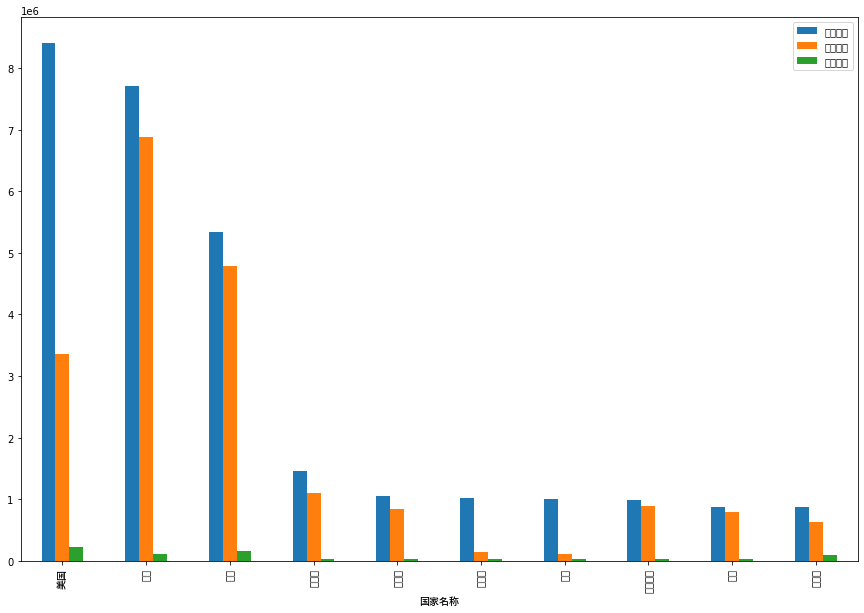

In [15]:
# 设置字体
font_path = "./NotoSansCJK.otf"
myfont = matplotlib.font_manager.FontProperties(fname=font_path)

# 绘图
# 按确诊人数进行排序
data_world = data_world.sort_values(by='确诊人数' ,ascending=False)
data_world_set = data_world[['确诊人数','治愈人数','死亡人数']]
data_world_set.index = data_world['国家名称']
data_world_set.head(10).plot(kind='bar',figsize=(15,10))
plt.xlabel('国家名称',fontproperties = myfont)
plt.xticks(fontproperties = myfont)

In [16]:
!pip install html5lib -i https://pypi.tuna.tsinghua.edu.cn/simple

Looking in indexes: https://pypi.tuna.tsinghua.edu.cn/simple


In [19]:
from pyecharts.charts import Map
from pyecharts import options as opts
from pyecharts.globals import CurrentConfig, NotebookType
CurrentConfig.NOTEBOOK_TYPE = NotebookType.JUPYTER_LAB


name_map = {  # 世界各国数据的中英文对比
    'Singapore Rep.': '新加坡',
    'Dominican Rep.': '多米尼加',
    'Palestine': '巴勒斯坦',
    'Bahamas': '巴哈马',
    'Timor-Leste': '东帝汶',
    'Afghanistan': '阿富汗',
    'Guinea-Bissau': '几内亚比绍',
    "Côte d'Ivoire": '科特迪瓦',
    'Siachen Glacier': '锡亚琴冰川',
    "Br. Indian Ocean Ter.": '英属印度洋领土',
    'Angola': '安哥拉',
    'Albania': '阿尔巴尼亚',
    'United Arab Emirates': '阿联酋',
    'Argentina': '阿根廷',
    'Armenia': '亚美尼亚',
    'French Southern and Antarctic Lands': '法属南半球和南极领地',
    'Australia': '澳大利亚',
    'Austria': '奥地利',
    'Azerbaijan': '阿塞拜疆',
    'Burundi': '布隆迪',
    'Belgium': '比利时',
    'Benin': '贝宁',
    'Burkina Faso': '布基纳法索',
    'Bangladesh': '孟加拉国',
    'Bulgaria': '保加利亚',
    'The Bahamas': '巴哈马',
    'Bosnia and Herz.': '波斯尼亚和黑塞哥维那',
    'Belarus': '白俄罗斯',
    'Belize': '伯利兹',
    'Bermuda': '百慕大',
    'Bolivia': '玻利维亚',
    'Brazil': '巴西',
    'Brunei': '文莱',
    'Bhutan': '不丹',
    'Botswana': '博茨瓦纳',
    'Central African Rep.': '中非',
    'Canada': '加拿大',
    'Switzerland': '瑞士',
    'Chile': '智利',
    'China': '中国',
    'Ivory Coast': '象牙海岸',
    'Cameroon': '喀麦隆',
    'Dem. Rep. Congo': '刚果民主共和国',
    'Congo': '刚果',
    'Colombia': '哥伦比亚',
    'Costa Rica': '哥斯达黎加',
    'Cuba': '古巴',
    'N. Cyprus': '北塞浦路斯',
    'Cyprus': '塞浦路斯',
    'Czech Rep.': '捷克',
    'Germany': '德国',
    'Djibouti': '吉布提',
    'Denmark': '丹麦',
    'Algeria': '阿尔及利亚',
    'Ecuador': '厄瓜多尔',
    'Egypt': '埃及',
    'Eritrea': '厄立特里亚',
    'Spain': '西班牙',
    'Estonia': '爱沙尼亚',
    'Ethiopia': '埃塞俄比亚',
    'Finland': '芬兰',
    'Fiji': '斐',
    'Falkland Islands': '福克兰群岛',
    'France': '法国',
    'Gabon': '加蓬',
    'United Kingdom': '英国',
    'Georgia': '格鲁吉亚',
    'Ghana': '加纳',
    'Guinea': '几内亚',
    'Gambia': '冈比亚',
    'Guinea Bissau': '几内亚比绍',
    'Eq. Guinea': '赤道几内亚',
    'Greece': '希腊',
    'Greenland': '格陵兰',
    'Guatemala': '危地马拉',
    'French Guiana': '法属圭亚那',
    'Guyana': '圭亚那',
    'Honduras': '洪都拉斯',
    'Croatia': '克罗地亚',
    'Haiti': '海地',
    'Hungary': '匈牙利',
    'Indonesia': '印度尼西亚',
    'India': '印度',
    'Ireland': '爱尔兰',
    'Iran': '伊朗',
    'Iraq': '伊拉克',
    'Iceland': '冰岛',
    'Israel': '以色列',
    'Italy': '意大利',
    'Jamaica': '牙买加',
    'Jordan': '约旦',
    'Japan': '日本',
    'Kazakhstan': '哈萨克斯坦',
    'Kenya': '肯尼亚',
    'Kyrgyzstan': '吉尔吉斯斯坦',
    'Cambodia': '柬埔寨',
    'Korea': '韩国',
    'Kosovo': '科索沃',
    'Kuwait': '科威特',
    'Lao PDR': '老挝',
    'Lebanon': '黎巴嫩',
    'Liberia': '利比里亚',
    'Libya': '利比亚',
    'Sri Lanka': '斯里兰卡',
    'Lesotho': '莱索托',
    'Lithuania': '立陶宛',
    'Luxembourg': '卢森堡',
    'Latvia': '拉脱维亚',
    'Morocco': '摩洛哥',
    'Moldova': '摩尔多瓦',
    'Madagascar': '马达加斯加',
    'Mexico': '墨西哥',
    'Macedonia': '马其顿',
    'Mali': '马里',
    'Myanmar': '缅甸',
    'Montenegro': '黑山',
    'Mongolia': '蒙古',
    'Mozambique': '莫桑比克',
    'Mauritania': '毛里塔尼亚',
    'Malawi': '马拉维',
    'Malaysia': '马来西亚',
    'Namibia': '纳米比亚',
    'New Caledonia': '新喀里多尼亚',
    'Niger': '尼日尔',
    'Nigeria': '尼日利亚',
    'Nicaragua': '尼加拉瓜',
    'Netherlands': '荷兰',
    'Norway': '挪威',
    'Nepal': '尼泊尔',
    'New Zealand': '新西兰',
    'Oman': '阿曼',
    'Pakistan': '巴基斯坦',
    'Panama': '巴拿马',
    'Peru': '秘鲁',
    'Philippines': '菲律宾',
    'Papua New Guinea': '巴布亚新几内亚',
    'Poland': '波兰',
    'Puerto Rico': '波多黎各',
    'Dem. Rep. Korea': '朝鲜',
    'Portugal': '葡萄牙',
    'Paraguay': '巴拉圭',
    'Qatar': '卡塔尔',
    'Romania': '罗马尼亚',
    'Russia': '俄罗斯',
    'Rwanda': '卢旺达',
    'W. Sahara': '西撒哈拉',
    'Saudi Arabia': '沙特阿拉伯',
    'Sudan': '苏丹',
    'S. Sudan': '南苏丹',
    'Senegal': '塞内加尔',
    'Solomon Is.': '所罗门群岛',
    'Sierra Leone': '塞拉利昂',
    'El Salvador': '萨尔瓦多',
    'Somaliland': '索马里兰',
    'Somalia': '索马里',
    'Serbia': '塞尔维亚',
    'Suriname': '苏里南',
    'Slovakia': '斯洛伐克',
    'Slovenia': '斯洛文尼亚',
    'Sweden': '瑞典',
    'Swaziland': '斯威士兰',
    'Syria': '叙利亚',
    'Chad': '乍得',
    'Togo': '多哥',
    'Thailand': '泰国',
    'Tajikistan': '塔吉克斯坦',
    'Turkmenistan': '土库曼斯坦',
    'East Timor': '东帝汶',
    'Trinidad and Tobago': '特里尼达和多巴哥',
    'Tunisia': '突尼斯',
    'Turkey': '土耳其',
    'Tanzania': '坦桑尼亚',
    'Uganda': '乌干达',
    'Ukraine': '乌克兰',
    'Uruguay': '乌拉圭',
    'United States': '美国',
    'Uzbekistan': '乌兹别克斯坦',
    'Venezuela': '委内瑞拉',
    'Vietnam': '越南',
    'Vanuatu': '瓦努阿图',
    'West Bank': '西岸',
    'Yemen': '也门',
    'South Africa': '南非',
    'Zambia': '赞比亚',
    'Zimbabwe': '津巴布韦',
    'Comoros': '科摩罗'
}

map = Map(init_opts=opts.InitOpts(
            width="1900px", 
            height="900px",
            bg_color="#ADD8E6", 
            page_title="全球疫情确诊人数"))  # 获得世界地图数据
map.add("确诊人数", 
        [list(z) for z in zip(data_world['国家名称'], 
                              data_world['确诊人数'])
        ],
        is_map_symbol_show=False,  # 添加确诊人数信息
        # 通过name_map来转化国家的中英文名称方便显示
        maptype="world", 
        label_opts=opts.LabelOpts(is_show=False), 
        name_map=name_map,
        itemstyle_opts=opts.ItemStyleOpts(color="rgb(49,60,72)"),
        ).set_global_opts(
            visualmap_opts=opts.VisualMapOpts(max_=1000000),  # 对视觉映射进行配置
        )
map.load_javascript()

In [20]:
map.render_notebook()

#### 疫情增长数据分析

In [27]:
country = data_area_times.sort_values('province_confirmedCount', ascending=False).drop_duplicates(subset='countryName',keep='first').head(6)['countryName']

In [29]:
country = list(country)
country

['美国', '巴西', '印度', '俄罗斯', '秘鲁', '智利']